In [1]:
#Import the necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from keras import Sequential
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("sonar.csv", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
print("Shape of df:",df.shape)

Shape of df: (208, 61)


In [5]:
df.isnull().sum()/df.shape[0]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
     ... 
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
60    0.0
Length: 61, dtype: float64

In [6]:
df.isnull().sum().sum()

0

In [7]:
print("Unique values for outcome:",df[60].unique())
print("\nPercentage of distribution for outcome-")
print(df[60].value_counts()/df.shape[0])

Unique values for outcome: ['R' 'M']

Percentage of distribution for outcome-
M    0.533654
R    0.466346
Name: 60, dtype: float64


In [8]:
#Checking the distinct datatypes in the dataset
print("Distinct DataTypes:",list(df.dtypes.unique()))

Distinct DataTypes: [dtype('float64'), dtype('O')]


In [9]:
#Create a temp dataset with the datatype of columns
temp = pd.DataFrame(df.dtypes)
temp.columns = ["DataType"]

In [10]:
float_columns = temp.index[temp.DataType == "float64"].values
float_columns

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [11]:
temp

,DataType
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64
8,float64
9,float64


In [12]:
categorical_columns = temp.index[temp.DataType == "O"].values
print("Categorical column - \n",categorical_columns)

Categorical column - 
 [60]


In [13]:
for column in categorical_columns:
    df[column] = np.where(df[column] == 'R',1,0)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [15]:
temp

,DataType
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64
8,float64
9,float64


In [16]:
df[target]

NameError: name 'target' is not defined

In [17]:
from sklearn.model_selection import train_test_split

target = 60

#split the final dataset into train and test with 80:20

x_train, x_test, y_train, y_test = train_test_split(df, df[target], test_size=0.2, random_state=2018)

#split the train dataset further into train and validation with 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the shape of each new dataset created
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (149, 61)
Shape of x_test: (42, 61)
Shape of x_val: (17, 61)
Shape of y_train: (149,)
Shape of y_test: (42,)
Shape of y_val: (17,)


In [18]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
23,0.0115,0.0150,0.0136,0.0076,0.0211,0.1058,0.1023,0.0440,0.0931,0.0734,...,0.0091,0.0016,0.0084,0.0064,0.0026,0.0029,0.0037,0.0070,0.0041,1
135,0.0094,0.0611,0.1136,0.1203,0.0403,0.1227,0.2495,0.4566,0.6587,0.5079,...,0.0234,0.0175,0.0352,0.0158,0.0326,0.0201,0.0168,0.0245,0.0154,0
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028,0
51,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,...,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023,1
88,0.0274,0.0242,0.0621,0.0560,0.1129,0.0973,0.1823,0.1745,0.1440,0.1808,...,0.0113,0.0108,0.0085,0.0047,0.0074,0.0104,0.0161,0.0220,0.0173,1
158,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,0
169,0.0130,0.0120,0.0436,0.0624,0.0428,0.0349,0.0384,0.0446,0.1318,0.1375,...,0.0084,0.0100,0.0018,0.0035,0.0058,0.0011,0.0009,0.0033,0.0026,0
147,0.0654,0.0649,0.0737,0.1132,0.2482,0.1257,0.1797,0.0989,0.2460,0.3422,...,0.0210,0.0361,0.0239,0.0447,0.0394,0.0355,0.0440,0.0243,0.0098,0
40,0.0068,0.0232,0.0513,0.0444,0.0249,0.0637,0.0422,0.1130,0.1911,0.2475,...,0.0173,0.0163,0.0055,0.0045,0.0068,0.0041,0.0052,0.0194,0.0105,1
94,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,1


In [20]:
from keras import Sequential
from keras.layers import Dense

#Design the deep neural network [Small + 1 layer]
model  = Sequential()
model.add(Dense(256, input_dim = x_train.shape[1] ,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) #activation = sigmoid for binary classification

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=10)

Train on 149 samples, validate on 17 samples
Epoch 1/3
149/149 [==============================] - 1s 4ms/step - loss: 0.6073 - acc: 0.6913 - val_loss: 0.5610 - val_acc: 0.8235
Epoch 2/3
149/149 [==============================] - 0s 654us/step - loss: 0.4794 - acc: 0.9597 - val_loss: 0.4531 - val_acc: 1.0000
Epoch 3/3
149/149 [==============================] - 0s 477us/step - loss: 0.3890 - acc: 0.9866 - val_loss: 0.3693 - val_acc: 1.0000


In [22]:
from keras import Sequential
from keras.layers import Dense

#Design the deep neural network [Small + 1 layer]
model  = Sequential()
model.add(Dense(16, input_dim = x_train.shape[1] ,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) #activation = sigmoid for binary classification

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=50, batch_size=10)

Train on 149 samples, validate on 17 samples
Epoch 1/50
149/149 [==============================] - 1s 5ms/step - loss: 0.7328 - acc: 0.5101 - val_loss: 0.7337 - val_acc: 0.4706
Epoch 2/50
149/149 [==============================] - 0s 596us/step - loss: 0.7026 - acc: 0.5168 - val_loss: 0.7073 - val_acc: 0.4706
Epoch 3/50
149/149 [==============================] - 0s 651us/step - loss: 0.6792 - acc: 0.5235 - val_loss: 0.6813 - val_acc: 0.4706
Epoch 4/50
149/149 [==============================] - 0s 600us/step - loss: 0.6591 - acc: 0.6040 - val_loss: 0.6657 - val_acc: 0.4706
Epoch 5/50
149/149 [==============================] - 0s 756us/step - loss: 0.6418 - acc: 0.6577 - val_loss: 0.6487 - val_acc: 0.5882
Epoch 6/50
149/149 [==============================] - 0s 794us/step - loss: 0.6259 - acc: 0.7114 - val_loss: 0.6330 - val_acc: 0.7059
Epoch 7/50
149/149 [==============================] - 0s 809us/step - loss: 0.6107 - acc: 0.7047 - val_loss: 0.6201 - val_acc: 0.7647
Epoch 8/50
149/149 

In [24]:
#Design the deep neural network [Small + 2 layers]
model  = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=50, batch_size=64)

Train on 149 samples, validate on 17 samples
Epoch 1/50
149/149 [==============================] - 1s 6ms/step - loss: 0.6716 - acc: 0.5906 - val_loss: 0.6091 - val_acc: 0.9412
Epoch 2/50
149/149 [==============================] - 0s 170us/step - loss: 0.5787 - acc: 0.9530 - val_loss: 0.5422 - val_acc: 1.0000
Epoch 3/50
149/149 [==============================] - 0s 138us/step - loss: 0.5016 - acc: 0.9933 - val_loss: 0.4591 - val_acc: 1.0000
Epoch 4/50
149/149 [==============================] - 0s 138us/step - loss: 0.4172 - acc: 1.0000 - val_loss: 0.3787 - val_acc: 1.0000
Epoch 5/50
149/149 [==============================] - 0s 123us/step - loss: 0.3347 - acc: 0.9933 - val_loss: 0.3032 - val_acc: 1.0000
Epoch 6/50
149/149 [==============================] - 0s 125us/step - loss: 0.2585 - acc: 1.0000 - val_loss: 0.2289 - val_acc: 1.0000
Epoch 7/50
149/149 [==============================] - 0s 160us/step - loss: 0.1905 - acc: 1.0000 - val_loss: 0.1698 - val_acc: 1.0000
Epoch 8/50
149/149 

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

C:\Users\Gulraiz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gulraiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Gulraiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Gulraiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  


In [28]:

from keras import Sequential
from keras.layers import Dense
model  = Sequential()
model.add(Dense(32,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train_scaled,y_train, 
validation_data = (x_val_scaled,y_val),epochs=200, batch_size=6)

Train on 149 samples, validate on 17 samples
Epoch 1/200
149/149 [==============================] - 1s 9ms/step - loss: 0.8090 - acc: 0.4698 - val_loss: 0.6716 - val_acc: 0.4706
Epoch 2/200
149/149 [==============================] - 0s 915us/step - loss: 0.5930 - acc: 0.6711 - val_loss: 0.5753 - val_acc: 0.6471
Epoch 3/200
149/149 [==============================] - 0s 1ms/step - loss: 0.4789 - acc: 0.8054 - val_loss: 0.4928 - val_acc: 0.7059
Epoch 4/200
149/149 [==============================] - 0s 1ms/step - loss: 0.3926 - acc: 0.8523 - val_loss: 0.4172 - val_acc: 0.8235
Epoch 5/200
149/149 [==============================] - 0s 1ms/step - loss: 0.3265 - acc: 0.8792 - val_loss: 0.3523 - val_acc: 0.8235
Epoch 6/200
149/149 [==============================] - 0s 1ms/step - loss: 0.2695 - acc: 0.9262 - val_loss: 0.3007 - val_acc: 0.8824
Epoch 7/200
149/149 [==============================] - 0s 1ms/step - loss: 0.2197 - acc: 0.9463 - val_loss: 0.2461 - val_acc: 0.9412
Epoch 8/200
149/149 [=

149/149 [==============================] - 0s 2ms/step - loss: 4.3114e-04 - acc: 1.0000 - val_loss: 0.0190 - val_acc: 1.0000
Epoch 62/200
149/149 [==============================] - 0s 1ms/step - loss: 4.1446e-04 - acc: 1.0000 - val_loss: 0.0187 - val_acc: 1.0000
Epoch 63/200
149/149 [==============================] - 0s 2ms/step - loss: 3.9801e-04 - acc: 1.0000 - val_loss: 0.0185 - val_acc: 1.0000
Epoch 64/200
149/149 [==============================] - 0s 2ms/step - loss: 3.8294e-04 - acc: 1.0000 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 65/200
149/149 [==============================] - 0s 1ms/step - loss: 3.6765e-04 - acc: 1.0000 - val_loss: 0.0181 - val_acc: 1.0000
Epoch 66/200
149/149 [==============================] - 0s 2ms/step - loss: 3.5442e-04 - acc: 1.0000 - val_loss: 0.0176 - val_acc: 1.0000
Epoch 67/200
149/149 [==============================] - 0s 1ms/step - loss: 3.4155e-04 - acc: 1.0000 - val_loss: 0.0175 - val_acc: 1.0000
Epoch 68/200
149/149 [=========================

149/149 [==============================] - 0s 1ms/step - loss: 7.5657e-05 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 121/200
149/149 [==============================] - 0s 1ms/step - loss: 7.3925e-05 - acc: 1.0000 - val_loss: 0.0097 - val_acc: 1.0000
Epoch 122/200
149/149 [==============================] - 0s 1ms/step - loss: 7.2172e-05 - acc: 1.0000 - val_loss: 0.0097 - val_acc: 1.0000
Epoch 123/200
149/149 [==============================] - 0s 2ms/step - loss: 7.0588e-05 - acc: 1.0000 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 124/200
149/149 [==============================] - 0s 1ms/step - loss: 6.9014e-05 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 125/200
149/149 [==============================] - 0s 1ms/step - loss: 6.7569e-05 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 1.0000
Epoch 126/200
149/149 [==============================] - 0s 1ms/step - loss: 6.6046e-05 - acc: 1.0000 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 127/200
149/149 [==================

149/149 [==============================] - 0s 1ms/step - loss: 2.3057e-05 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 180/200
149/149 [==============================] - 0s 1ms/step - loss: 2.2654e-05 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 181/200
149/149 [==============================] - 0s 1ms/step - loss: 2.2258e-05 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 182/200
149/149 [==============================] - 0s 1ms/step - loss: 2.1870e-05 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 183/200
149/149 [==============================] - 0s 1ms/step - loss: 2.1500e-05 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 184/200
149/149 [==============================] - 0s 1ms/step - loss: 2.1086e-05 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 185/200
149/149 [==============================] - 0s 1ms/step - loss: 2.0734e-05 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 186/200
149/149 [==================

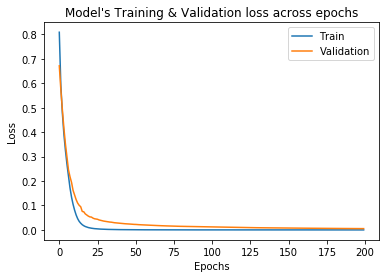

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

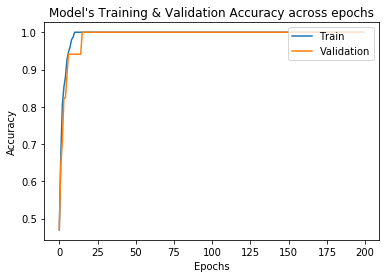

In [30]:

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [34]:
from keras import Sequential
from keras.layers import Dense
model  = Sequential()
model.add(Dense(6,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train_scaled,y_train, 
validation_data = (x_val_scaled,y_val),epochs=500, batch_size=6)

Train on 149 samples, validate on 17 samples
Epoch 1/500
149/149 [==============================] - 1s 10ms/step - loss: 0.6433 - acc: 0.5705 - val_loss: 0.6488 - val_acc: 0.5294
Epoch 2/500
149/149 [==============================] - 0s 1ms/step - loss: 0.6098 - acc: 0.6107 - val_loss: 0.6184 - val_acc: 0.7059
Epoch 3/500
149/149 [==============================] - 0s 1ms/step - loss: 0.5816 - acc: 0.6913 - val_loss: 0.5877 - val_acc: 0.7647
Epoch 4/500
149/149 [==============================] - 0s 1ms/step - loss: 0.5507 - acc: 0.7718 - val_loss: 0.5636 - val_acc: 0.7647
Epoch 5/500
149/149 [==============================] - 0s 1ms/step - loss: 0.5190 - acc: 0.8188 - val_loss: 0.5381 - val_acc: 0.8235
Epoch 6/500
149/149 [==============================] - 0s 1ms/step - loss: 0.4858 - acc: 0.8188 - val_loss: 0.5055 - val_acc: 0.8235
Epoch 7/500
149/149 [==============================] - 0s 1ms/step - loss: 0.4492 - acc: 0.8456 - val_loss: 0.4720 - val_acc: 0.8824
Epoch 8/500
149/149 [==

Epoch 62/500
149/149 [==============================] - 0s 1ms/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0431 - val_acc: 1.0000
Epoch 63/500
149/149 [==============================] - 0s 2ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0409 - val_acc: 1.0000
Epoch 64/500
149/149 [==============================] - 0s 1ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0396 - val_acc: 1.0000
Epoch 65/500
149/149 [==============================] - 0s 1ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0386 - val_acc: 1.0000
Epoch 66/500
149/149 [==============================] - 0s 2ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0372 - val_acc: 1.0000
Epoch 67/500
149/149 [==============================] - 0s 1ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0361 - val_acc: 1.0000
Epoch 68/500
149/149 [==============================] - 0s 1ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.0351 - val_acc: 1.0000
Epoch 69/500
149/149 [==============================] - 0s 2ms

149/149 [==============================] - 0s 1ms/step - loss: 5.4392e-04 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 123/500
149/149 [==============================] - 0s 2ms/step - loss: 5.3016e-04 - acc: 1.0000 - val_loss: 0.0116 - val_acc: 1.0000
Epoch 124/500
149/149 [==============================] - 0s 1ms/step - loss: 5.1699e-04 - acc: 1.0000 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 125/500
149/149 [==============================] - 0s 1ms/step - loss: 5.0377e-04 - acc: 1.0000 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 126/500
149/149 [==============================] - 0s 1ms/step - loss: 4.9206e-04 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 1.0000
Epoch 127/500
149/149 [==============================] - 0s 2ms/step - loss: 4.7928e-04 - acc: 1.0000 - val_loss: 0.0110 - val_acc: 1.0000
Epoch 128/500
149/149 [==============================] - 0s 1ms/step - loss: 4.6835e-04 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 129/500
149/149 [==================

149/149 [==============================] - 0s 1ms/step - loss: 1.4981e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 182/500
149/149 [==============================] - 0s 2ms/step - loss: 1.4705e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 183/500
149/149 [==============================] - 0s 1ms/step - loss: 1.4417e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 184/500
149/149 [==============================] - 0s 1ms/step - loss: 1.4163e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 185/500
149/149 [==============================] - 0s 1ms/step - loss: 1.3890e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 186/500
149/149 [==============================] - 0s 1ms/step - loss: 1.3626e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 187/500
149/149 [==============================] - 0s 2ms/step - loss: 1.3394e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 188/500
149/149 [==================

149/149 [==============================] - 0s 1ms/step - loss: 5.2675e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 241/500
149/149 [==============================] - 0s 1ms/step - loss: 5.1810e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 242/500
149/149 [==============================] - 0s 1ms/step - loss: 5.0959e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 243/500
149/149 [==============================] - 0s 1ms/step - loss: 5.0133e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 244/500
149/149 [==============================] - 0s 2ms/step - loss: 4.9288e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 245/500
149/149 [==============================] - 0s 1ms/step - loss: 4.8513e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 246/500
149/149 [==============================] - 0s 2ms/step - loss: 4.7652e-05 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 247/500
149/149 [==================

149/149 [==============================] - 0s 1ms/step - loss: 2.0331e-05 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 300/500
149/149 [==============================] - 0s 1ms/step - loss: 2.0012e-05 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 301/500
149/149 [==============================] - 0s 1ms/step - loss: 1.9715e-05 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 302/500
149/149 [==============================] - 0s 1ms/step - loss: 1.9420e-05 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 303/500
149/149 [==============================] - 0s 1ms/step - loss: 1.9099e-05 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 304/500
149/149 [==============================] - 0s 1ms/step - loss: 1.8827e-05 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 305/500
149/149 [==============================] - 0s 1ms/step - loss: 1.8540e-05 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 306/500
149/149 [==================

149/149 [==============================] - 0s 2ms/step - loss: 8.4638e-06 - acc: 1.0000 - val_loss: 8.7823e-04 - val_acc: 1.0000
Epoch 358/500
149/149 [==============================] - 0s 1ms/step - loss: 8.3397e-06 - acc: 1.0000 - val_loss: 8.6715e-04 - val_acc: 1.0000
Epoch 359/500
149/149 [==============================] - 0s 1ms/step - loss: 8.2201e-06 - acc: 1.0000 - val_loss: 8.6061e-04 - val_acc: 1.0000
Epoch 360/500
149/149 [==============================] - 0s 1ms/step - loss: 8.0969e-06 - acc: 1.0000 - val_loss: 8.5161e-04 - val_acc: 1.0000
Epoch 361/500
149/149 [==============================] - 0s 1ms/step - loss: 7.9765e-06 - acc: 1.0000 - val_loss: 8.4290e-04 - val_acc: 1.0000
Epoch 362/500
149/149 [==============================] - 0s 1ms/step - loss: 7.8643e-06 - acc: 1.0000 - val_loss: 8.4081e-04 - val_acc: 1.0000
Epoch 363/500
149/149 [==============================] - 0s 1ms/step - loss: 7.7425e-06 - acc: 1.0000 - val_loss: 8.3254e-04 - val_acc: 1.0000
Epoch 364/500

KeyboardInterrupt: 

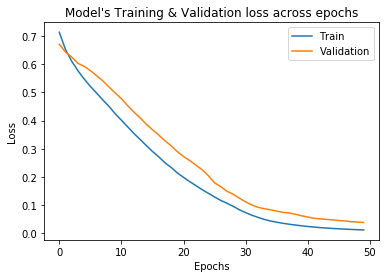

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

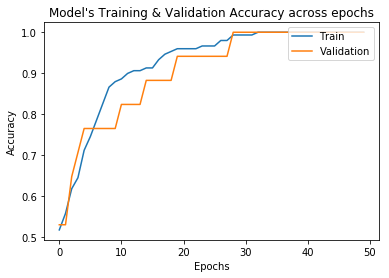

In [33]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()